<h1 align='center'> Task3: Exploratory Data Analysis - Retail (Level - Beginner)</h1>
<h4 align='center'> Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. </h4>

<h3 align='right'> Eben Emmanuel </h3>

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('ggplot')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Objective

In this Jupyter notebook as a business manager we will be trying to find out the weak areas in the store where we can work to make more profit.

## 2. Loading the required Data

In [2]:
# Importing the data.
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
# Viewing the imported data.
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
print("Dimensionality of the dataset: ", df.shape)

Dimensionality of the dataset:  (9994, 13)


## 2. Exploratory Data Analysis

In [5]:
## Obtaining the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
## Description of the numerical columns 
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Missing Values

- In any dataset we will initially try to find out where the missing data are. 

<AxesSubplot:>

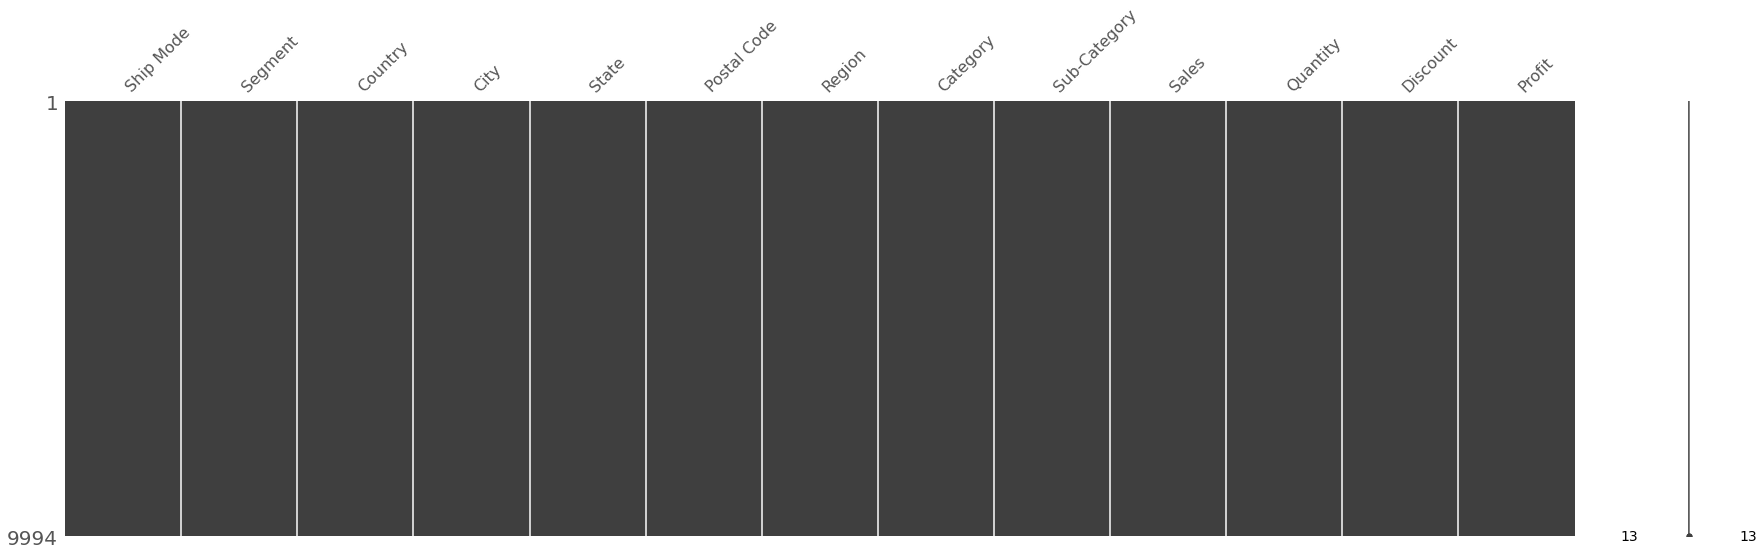

In [7]:
# To plot a graphic of missing values
missingno.matrix(df,figsize=(30,8))     ## sns.heatmap(df.isnull())

- It is important to visualise missing values, because then you will know what are the major NaN values in your dataset.
- Here we can see that none of the columns have any missing values.

In [43]:
# Another method to find missing values
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

### What Datatypes are there in the dataframe?

We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

However, sometimes the features that we consider as numerical might actually turn out to be categorical.

The next few steps will help us figure out how to process our data so our machine learning model can learn from it.
Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).

In [9]:
# Datatypes in the dataset
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### Exploring each of these features 
We will go through each of the columns and see which all we can use in our models. 

#### OBJECTIVES

1. Which Ship Mode showcases the highest Profit and Sales.
2. In each Segment which Ship Mode is preferred.
3. Profit and Sales of each Segment.
4. Profit and Loss making Cities in each Segment.
5. Ship Mode preferred by the highest Profit making City.
6. Profit and Sales of the top 5 Profit making Cities.
7. Profit and Sales Visualization for each Category.
8. City with highest and lowest quantity for each Category.
9. Loss bearing Cities for each Category.
10. Top 5 Profit making Items in each Category.
11. Bottom 5 Profit making Items in each Category.
12. Profit and Sales for each Item.
13. Impact of Profit and Sales with Discount

In [10]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### FEATURE 1: Ship Mode

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


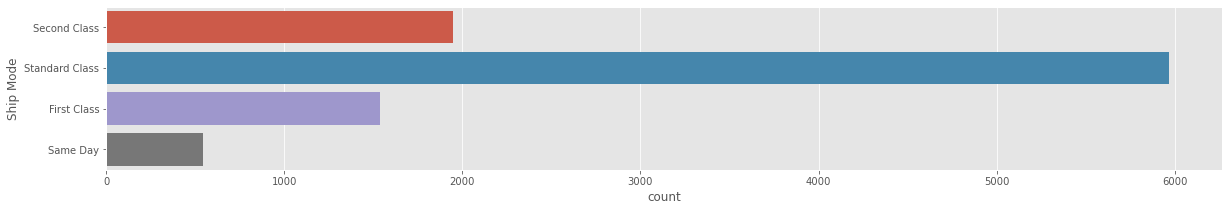

In [11]:
plt.figure(figsize=(20,3))
sns.countplot(y='Ship Mode',data=df)
print(df['Ship Mode'].value_counts())

- Here we can see that most of the shipment was done with the ***standard class*** and only a few were done on the ***same day***.

#### Sales and Profit made by each Ship Mode

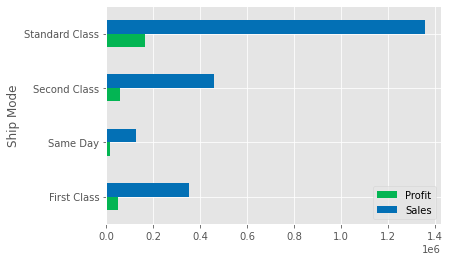

In [12]:
shipment_group = df.groupby('Ship Mode')['Profit','Sales'].sum().plot(kind= 'barh', color= ['#03B553','#0370B5'])

> From the previous graph (countplot graph) we saw that most of the shipments were made through 'Standard Class'. Here we can see that shipments made with 'Standard Class' has given us more profit than the others and we can also see that it has the highest sales.

#### FEATURE 2: Segment
Description: 

In [13]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

- Here we cn see that there are mainly 3 segments 'Consumer', 'Corporate', 'Home Office'.

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


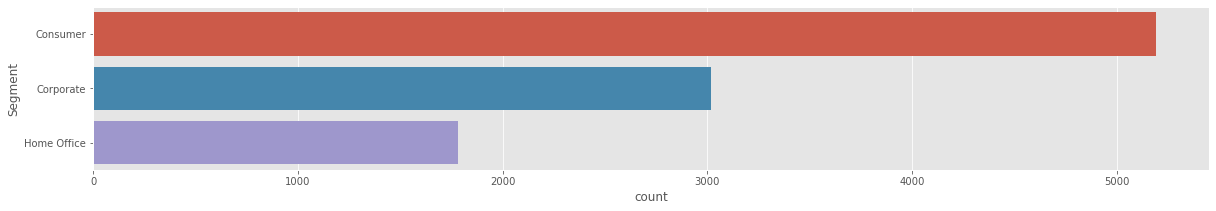

In [14]:
plt.figure(figsize=(20,3))
sns.countplot(y='Segment',data=df)
print(df['Segment'].value_counts())

- We can see that there are more number of consumers in the segments.

#### Ship Modes & Segments

In [15]:
table = pd.pivot_table(df, index=["Segment","Ship Mode"], values= 'Quantity', aggfunc= 'count')
table

Quantity
Segment     Ship Mode               
Consumer    First Class          769
            Same Day             317
            Second Class        1020
            Standard Class      3085
Corporate   First Class          485
            Same Day             114
            Second Class         609
            Standard Class      1812
Home Office First Class          284
            Same Day             112
            Second Class         316
            Standard Class      1071

In [16]:
table.query('Segment == ["Consumer"]').sort_values(by= 'Quantity', ascending= False)

Quantity
Segment  Ship Mode               
Consumer Standard Class      3085
         Second Class        1020
         First Class          769
         Same Day             317

In [17]:
table.query('Segment == ["Corporate"]').sort_values(by= 'Quantity', ascending= False)

Quantity
Segment   Ship Mode               
Corporate Standard Class      1812
          Second Class         609
          First Class          485
          Same Day             114

In [18]:
table.query('Segment == ["Home Office"]').sort_values(by= 'Quantity', ascending= False)

Quantity
Segment     Ship Mode               
Home Office Standard Class      1071
            Second Class         316
            First Class          284
            Same Day             112

- Here we can see that all segments have made most of their shipment using the 'Standard Class' mode. 
- It can aso be seen that shipment using 'Same Day' mode is the least prefered

#### Sales and Profit made by each Segment

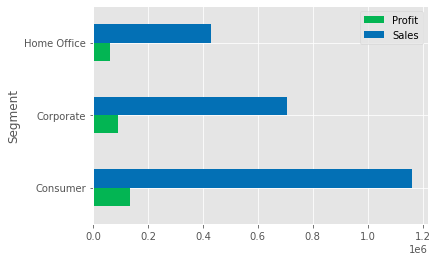

In [19]:
segment_group = df.groupby('Segment')['Profit','Sales'].sum().plot(kind= 'barh', color= ['#03B553','#0370B5'])

> From the above plot we can see that the 'Consumer' has contributed more to the 'Sales' and has also given a higher 'Profit'.

### We will not be considering the 'Country' column as here we are taking into account only **United States**.

#### FEATURE 3: City	
Description: 

In [20]:
table1 = pd.pivot_table(df, index=["Segment","City"], values= 'Profit', aggfunc= 'sum')

1. **Top 3 Profit making cities for each Segment**

In [21]:
## For Consumer
table1.query('Segment == ["Consumer"]').nlargest(3, 'Profit')

Profit
Segment  City                     
Consumer New York City  30618.8441
         Los Angeles    16508.7529
         Seattle        16389.6527

In [22]:
## For Corporate
table1.query('Segment == ["Corporate"]').nlargest(3, 'Profit')

Profit
Segment   City                     
Corporate New York City  14084.7411
          Lafayette       8836.5701
          Seattle         8653.2590

In [23]:
## For Home Office
table1.query('Segment == ["Home Office"]').nlargest(3, 'Profit')

Profit
Segment     City                     
Home Office New York City  17333.3985
            Los Angeles     6578.9561
            Providence      5359.7931

#### Here we can see that in all the segments New York is the City where we get the maximum Profit.

2. **Top 3 Loss making cities for each Segment**

In [24]:
## For Consumer
table1.query('Segment == ["Consumer"]').nsmallest(3, 'Profit')

Profit
Segment  City                  
Consumer Houston     -8327.0702
         San Antonio -6913.8397
         Lancaster   -6871.2652

In [25]:
## For Corporate
table1.query('Segment == ["Corporate"]').nsmallest(3, 'Profit')

Profit
Segment   City                   
Corporate Philadelphia -4744.8304
          Chicago      -2952.0811
          Burlington   -2490.0675

In [26]:
## For Home Office
table1.query('Segment == ["Home Office"]').nsmallest(3, 'Profit')

Profit
Segment     City                   
Home Office Louisville   -3008.4015
            Philadelphia -2958.5357
            Jacksonville -1388.3890

- #### Here we can see that for :-
    - Consumer --> Huston is the city that can be seen to have major loss.
    - Corporate --> Philadelphia is the city that can be seen to have major loss.
    - Home Office --> Louisville is the city that can be seen to have major loss.

#### Which Ship Mode does New York City use the most?

In [27]:
X = pd.pivot_table(df, index=["Segment","City","Ship Mode"], values= 'Quantity', aggfunc= 'count')
X.query('City == ["New York City"]')

Quantity
Segment     City          Ship Mode               
Consumer    New York City First Class           73
                          Same Day              33
                          Second Class          91
                          Standard Class       307
Corporate   New York City First Class           32
                          Same Day               8
                          Second Class          53
                          Standard Class       173
Home Office New York City First Class           42
                          Same Day              11
                          Second Class          23
                          Standard Class        69

#### Sales and Profit made by the Top 5 profit making Cities

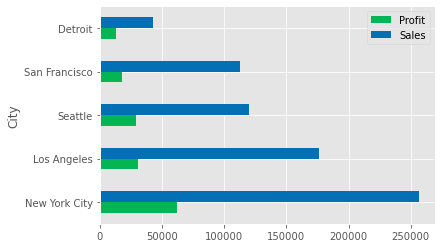

In [28]:
city_group = df.groupby('City')['Profit','Sales'].sum().nlargest(5, 'Profit').plot(kind= 'barh', color= ['#03B553','#0370B5'])

> From the above plot we can see that 'New York City' has contributed more to the 'Sales' and has also given a higher 'Profit'.

#### FEATURE 4: Category	
Description: 

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


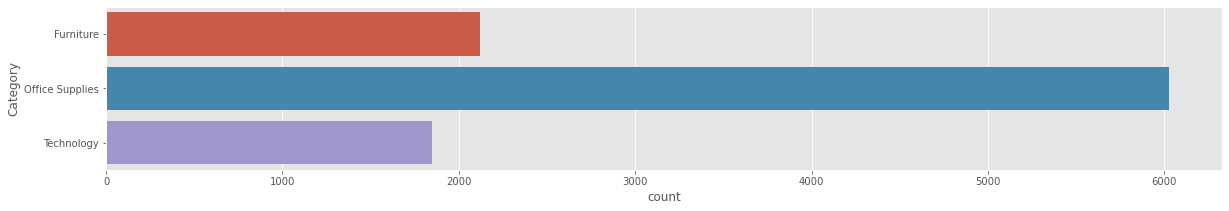

In [29]:
plt.figure(figsize=(20,3))
sns.countplot(y='Category',data=df)
print(df['Category'].value_counts())

- We can see that there are more number of Office Supplies prefered.

#### Sales and Profit made by each Category (Item)

                      Profit        Sales
Category                                 
Furniture         18451.2728  741999.7953
Office Supplies  122490.8008  719047.0320
Technology       145454.9481  836154.0330 




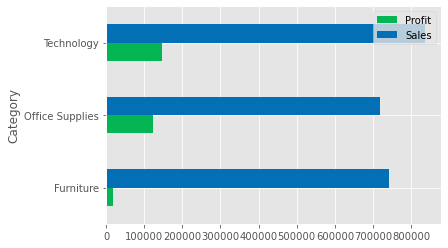

In [30]:
print(df.groupby('Category')['Profit','Sales'].sum(),'\n\n')
category_group = df.groupby('Category')['Profit','Sales'].sum().plot(kind= 'barh', color= ['#03B553','#0370B5'])

> Even though Office Supplies are prefered more, from the Sales - Profit chart we can see that 'Technology' has contributed more to the 'Sales' and has also given a higher 'Profit'.

#### Which City has the highest and lowest quantity for each Item?

In [31]:
table2 = pd.pivot_table(df, index=["Category","City"], values= 'Quantity', aggfunc= 'sum')

- ***For Office Supplies***

In [32]:
print('Highest \n' ,table2.query('Category == ["Office Supplies"]').nlargest(1, 'Quantity'),'\n\n')
print('Lowest \n',table2.query('Category == ["Office Supplies"]').nsmallest(1, 'Quantity'))

Highest 
                                Quantity
Category        City                   
Office Supplies New York City      2065 


Lowest 
                        Quantity
Category        City           
Office Supplies Boise         1


- ***For Furniture***

In [33]:
print('Highest \n' ,table2.query('Category == ["Furniture"]').nlargest(1, 'Quantity'),'\n\n')
print('Lowest \n',table2.query('Category == ["Furniture"]').nsmallest(1, 'Quantity'))

Highest 
                          Quantity
Category  City                   
Furniture New York City       720 


Lowest 
                     Quantity
Category  City              
Furniture Bellevue         1


- ***For Technology***

In [34]:
print('Highest \n' ,table2.query('Category == ["Technology"]').nlargest(1, 'Quantity'),'\n\n')
print('Lowest \n',table2.query('Category == ["Technology"]').nsmallest(1, 'Quantity'))

Highest 
                           Quantity
Category   City                   
Technology New York City       632 


Lowest 
                   Quantity
Category   City           
Technology Chico         1


> Here we can see that for all the three Categories the people of New York City have bought the most.  

#### Five cities wich give the lowest profit for each category.

In [35]:
table3 = pd.pivot_table(df, index=["Category","City"], values= ['Profit','Sales','Quantity'], aggfunc= 'sum')

In [36]:
print('Lowest for Office Supplies\n',table3.query('Category == ["Office Supplies"]').nsmallest(5, 'Profit'), '\n\n\n')
print('Lowest for Technology\n',table3.query('Category == ["Technology"]').nsmallest(5, 'Profit'), '\n\n\n')
print('Lowest for Furniture\n',table3.query('Category == ["Furniture"]').nsmallest(5, 'Profit'))

Lowest for Office Supplies
                                  Profit  Quantity      Sales
Category        City                                        
Office Supplies Houston      -8108.9256       924  16369.564
                Chicago      -6229.8294       700  13860.224
                San Antonio  -5689.9195       137   4286.656
                Philadelphia -3867.5058      1127  30658.153
                Dallas       -1504.6771       360   6009.548 



Lowest for Technology
                             Profit  Quantity      Sales
Category   City                                        
Technology Lancaster    -6879.7098        24   6022.177
           Burlington   -3311.1092        21   9983.716
           Philadelphia -3143.1362       405  41923.319
           Louisville   -2896.4869        60   5203.575
           Jacksonville -1294.7696       106  29188.352 



Lowest for Furniture
                            Profit  Quantity       Sales
Category  City                              

> Now we can see that the quantities being sold are moderate for most of these cities. What can be the problem is that "maybe the Sales price is lower than the Purchasing price".

#### FEATURE 5: Sub-Category	
Description: 

<AxesSubplot:xlabel='count', ylabel='Sub-Category'>

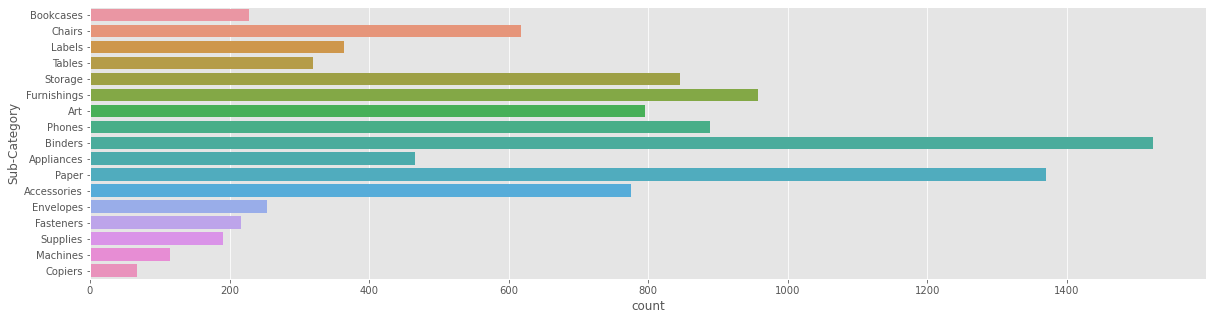

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sub-Category',data=df)

> We can see that Binders have a more number of count than other items.

#### Five Items wich give the maximum profit for each category.

In [38]:
table4 = pd.pivot_table(df, index=["Category","Sub-Category"], values= ['Profit','Sales','Quantity'], aggfunc= 'sum')

In [39]:
print('Lowest for Office Supplies\n',table4.query('Category == ["Office Supplies"]').nlargest(5, 'Profit'), '\n\n\n')
print('Lowest for Technology\n',table4.query('Category == ["Technology"]').nlargest(5, 'Profit'), '\n\n\n')
print('Lowest for Furniture\n',table4.query('Category == ["Furniture"]').nlargest(5, 'Profit'))

Lowest for Office Supplies
                                   Profit  Quantity       Sales
Category        Sub-Category                                  
Office Supplies Paper         34053.5693      5178   78479.206
                Binders       30221.7633      5974  203412.733
                Storage       21278.8264      3158  223843.608
                Appliances    18138.0054      1729  107532.161
                Envelopes      6964.1767       906   16476.402 



Lowest for Technology
                              Profit  Quantity       Sales
Category   Sub-Category                                  
Technology Copiers       55617.8249       234  149528.030
           Phones        44515.7306      3289  330007.054
           Accessories   41936.6357      2976  167380.318
           Machines       3384.7569       440  189238.631 



Lowest for Furniture
                             Profit  Quantity        Sales
Category  Sub-Category                                   
Furniture Chai

#### Five Items wich give the least profit for each category.

In [40]:
print('Lowest for Office Supplies\n',table4.query('Category == ["Office Supplies"]').nsmallest(5, 'Profit'), '\n\n\n')
print('Lowest for Technology\n',table4.query('Category == ["Technology"]').nsmallest(5, 'Profit'), '\n\n\n')
print('Lowest for Furniture\n',table4.query('Category == ["Furniture"]').nsmallest(5, 'Profit'))

Lowest for Office Supplies
                                  Profit  Quantity      Sales
Category        Sub-Category                                
Office Supplies Supplies     -1189.0995       647  46673.538
                Fasteners      949.5182       914   3024.280
                Labels        5546.2540      1400  12486.312
                Art           6527.7870      3000  27118.792
                Envelopes     6964.1767       906  16476.402 



Lowest for Technology
                              Profit  Quantity       Sales
Category   Sub-Category                                  
Technology Machines       3384.7569       440  189238.631
           Accessories   41936.6357      2976  167380.318
           Phones        44515.7306      3289  330007.054
           Copiers       55617.8249       234  149528.030 



Lowest for Furniture
                             Profit  Quantity        Sales
Category  Sub-Category                                   
Furniture Tables       -1772

#### Sales and Profit made by each Sub-Category

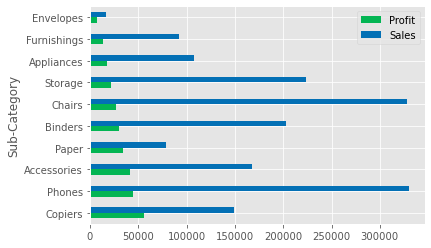

In [41]:
subcategory_group = df.groupby('Sub-Category')['Profit','Sales'].sum().nlargest(10,'Profit').plot(kind= 'barh', color= ['#03B553','#0370B5'])

#### FEATURE 6: Sales, Discount & Profit

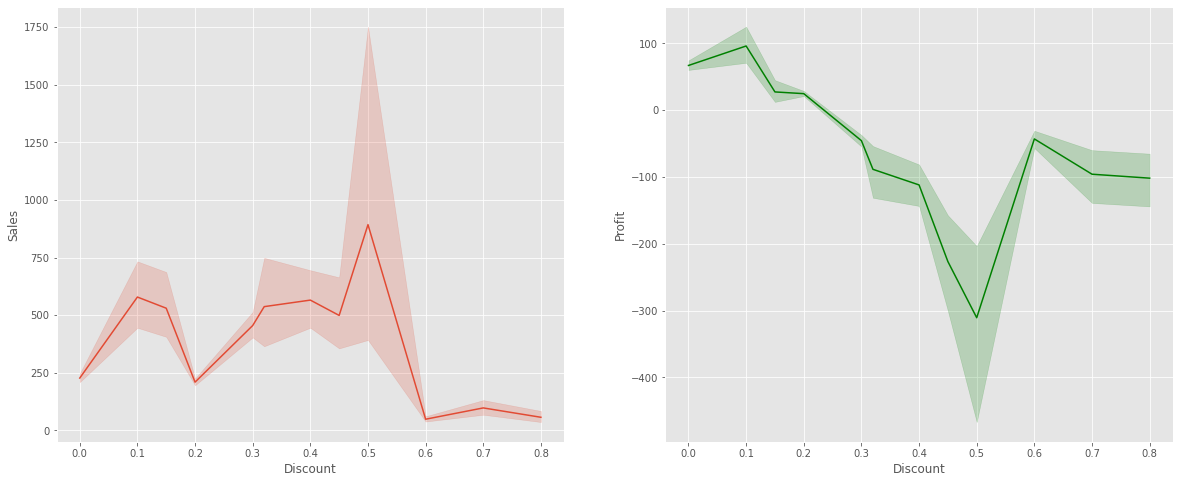

In [42]:
plt.figure(figsize= (20,8))
plt.subplot(1,2,1)
sns.lineplot(x= 'Discount', y= 'Sales', data= df)
plt.subplot(1,2,2)
sns.lineplot(x= 'Discount', y= 'Profit', data= df, color='green')
plt.show()

> ### Here we can see that after 50% Discount offer the Sales tend to go really low we can also see that there is a dip in profit at this point. But one important observation is that when there was no Discount the Profit was pretty high.